(300, 300, 3)
[1.51727443]
CAT


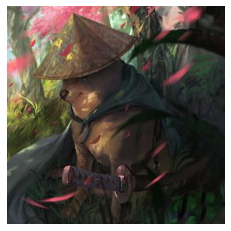

In [1]:
from cgi import test
import matplotlib.pyplot as plt
import skimage.io, skimage.color
import numpy as np
import pandas as pd

from skimage.feature import hog
from skimage.transform import resize
from skimage import data, exposure

from skimage.io import imread


def  TORT (A):
    m,n  = np.shape(A)
    U = np.zeros((m,n))
    p = min(m-1,n)
    beta = np.zeros((p,1))
    for k in range(p):
        s=0
        for i in range(k,m):
            s = s+ A[i, k]**2
        sigma = np.sign(A[k,k])*np.sqrt(s)
        
        if sigma != 0:
            U[k,k] = A[k,k] +sigma
            for i in range(k+1,m):
                U[i,k] = A[i,k]            
            beta[k] = sigma*U[k,k]
            for j in range(k,n):
                tau = 0
                for q in range(k,m):
                    tau = tau + U[q,k]*A[q,j]
                tau =tau/beta[k]
                for i in range(k,m):
                    A[i,j] = A[i, j] - tau *U[i,k]
                    
    return U, A, beta


def Utris(U, label):
    n = len(U)
    x = np.zeros((n,1))
    for i in range(n-1,-1, -1):
        s = label[i]
        for j in range(i+1,n):
            s = s -U[i][j]*x[j]
        x[i] = s/U[i][i]
    return x


#Data_Set200 este setul de date pentru a verifica corectitudinea CMMP-ului
#Setul de date este mai mic decat cel initial pentru o rulare mai rapida
df = pd.read_csv('Data_Set200.csv')
df_t = pd.read_csv('Data_Set200_testare.csv')

df['label'].nunique()

features = df.drop('label', axis=1)
label = df['label']


testFeatures = df_t.to_numpy() 

m, n = features.shape

A = np.append(features, np.ones((m,1)),axis = 1)

m, n = np.shape(A)


U, R, beta = TORT(A)

for k in range(n):
    tau=0
    for i in range(k,m):
        tau = tau + U[i,k] * label[i]
    tau = tau / beta[k]
    for i in range(k,m):
        label[i] = label[i] - tau * U[i,k]

x  = Utris(R[0:n,:], label[0:n])

i = input('Introduceti o valoare intre 0 si 12: ')

#Afisarea imaginii testate
img = imread('Smaller_Animals\\{}.jpg'.format(int(i)+1))
plt.axis("off")
plt.imshow(img,cmap="gray")

print(img.shape)
test_label=testFeatures[int(i),:]@x[:n-1] + x[n-1]


print(test_label)

if test_label >= 0:
    print('CAT')
else: print('DOG')
